# Алгоритмы интеллектуальной обработки больших объемов данных
## Домашнее задание №3: Линейные модели


###### <hr\>
**Общая информация**

**Срок сдачи:** 5 ноября 2019, 06:00 <br\>
**Штраф за опоздание:** -2 балла после 06:00 5 ноября, -4 балла после 06:00 12 ноября, -6 баллов после 06:00 19 ноября  -8 баллов после 06:00 26 ноября.

При отправлении ДЗ указывайте фамилию в названии файла<br\>

Используйте данный Ipython Notebook при оформлении домашнего задания.

**Штрафные баллы:**

1. Невыполнение PEP8 -1 балл
2. Отсутствие фамилии в имени скрипта (скрипт должен называться по аналогии со stroykova_hw2.ipynb) -1 балл
3. Все строчки должны быть выполнены. Нужно, чтобы output команды можно было увидеть уже в git'е. В противном случае -1 балл
4. При оформлении ДЗ нужно пользоваться данным файлом в качестве шаблона. Не нужно удалять и видоизменять написанный код и текст, если явно не указана такая возможность. В противном случае -1 балл
<hr\>

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (12,5)

Здравствуйте, уважаемые студенты! 

В этом задании мы будем реализовать линейные модели. Необходимо реализовать линейную и логистическую регрессии с L2 регуляризацией

# Теоретическое введение



Линейная регрессия решает задачу регрессии и оптимизирует функцию потерь MSE 

$$L(w) =  \frac{1}{N}\left[\sum_i (y_i - a_i) ^ 2 \right], $$ где $y_i$ $-$ целевая функция,  $a_i = a(x_i) =  \langle\,x_i,w\rangle ,$ $-$ предсказание алгоритма на объекте $x_i$, $w$ $-$ вектор весов (размерности $D$), $x_i$ $-$ вектор признаков (такой же размерности $D$).

Не забываем, что здесь и далее  мы считаем, что в $x_i$ есть тождественный вектор единиц, ему соответствует вес $w_0$.


Логистическая регрессия является линейным классификатором, который оптимизирует так называемый функционал log loss:

$$L(w) = - \frac{1}{N}\left[\sum_i y_i \log a_i + ( 1 - y_i) \log (1 - a_i) \right],$$
где  $y_i  \in \{0,1\}$ $-$ метка класса, $a_i$ $-$ предсказание алгоритма на объекте $x_i$. Модель пытается предсказать апостериорую вероятность объекта принадлежать к классу "1":
$$ p(y_i = 1 | x_i) = a(x_i) =  \sigma( \langle\,x_i,w\rangle ),$$
$w$ $-$ вектор весов (размерности $D$), $x_i$ $-$ вектор признаков (такой же размерности $D$).

Функция $\sigma(x)$ $-$ нелинейная функция, пероводящее скалярное произведение объекта на веса в число $\in (0,1)$ (мы же моделируем вероятность все-таки!)

$$\sigma(x) = \frac{1}{1 + \exp(-x)}$$

Если внимательно посмотреть на функцию потерь, то можно заметить, что в зависимости от правильного ответа алгоритм штрафуется или функцией $-\log a_i$, или функцией $-\log (1 - a_i)$.



Часто для решения проблем, которые так или иначе связаны с проблемой переобучения, в функционал качества добавляют слагаемое, которое называют ***регуляризацией***. Итоговый функционал для линейной регрессии тогда принимает вид:

$$L(w) =  \frac{1}{N}\left[\sum_i (y_i - a_i) ^ 2 \right] + \frac{1}{C}R(w) $$

Для логистической: 
$$L(w) = - \frac{1}{N}\left[\sum_i y_i \log a_i + ( 1 - y_i) \log (1 - a_i) \right] +  \frac{1}{C}R(w)$$

Самое понятие регуляризации введено основателем ВМК академиком Тихоновым https://ru.wikipedia.org/wiki/Метод_регуляризации_Тихонова

Идейно методика регуляризации заключается в следующем $-$ мы рассматриваем некорректно поставленную задачу (что это такое можно найти в интернете), для того чтобы сузить набор различных вариантов (лучшие из которых будут являться переобучением ) мы вводим дополнительные ограничения на множество искомых решений. На лекции Вы уже рассмотрели два варианта регуляризации.

$L1$ регуляризация:
$$R(w) = \sum_{j=1}^{D}|w_j|$$
$L2$ регуляризация:
$$R(w) =  \sum_{j=1}^{D}w_j^2$$

С их помощью мы ограничиваем модель в  возможности выбора каких угодно весов минимизирующих наш лосс, модель уже не сможет подстроиться под данные как ей угодно. 

Вам нужно добавить соотвествущую Вашему варианту $L2$ регуляризацию.

И так, мы поняли, какую функцию ошибки будем минимизировать, разобрались, как получить предсказания по объекту и обученным весам. Осталось разобраться, как получить оптимальные веса. Для этого нужно выбрать какой-то метод оптимизации.



Градиентный спуск является самым популярным алгоритмом обучения линейных моделей. В этом задании Вам предложат реализовать стохастический градиентный спуск или  мини-батч градиентный спуск (мини-батч на русский язык довольно сложно перевести, многие переводят это как "пакетный", но мне не кажется этот перевод удачным). Далее нам потребуется определение **эпохи**.
Эпохой в SGD и MB-GD называется один проход по **всем** объектам в обучающей выборки.
* В SGD градиент расчитывается по одному случайному объекту. Сам алгоритм выглядит примерно так:
        1) Перемешать выборку
        2) Посчитать градиент функции потерь на одном объекте (далее один объект тоже будем называть батчем)
        3) Сделать шаг спуска
        4) Повторять 2) и 3) пока не пройдет максимальное число эпох.
* В Mini Batch SGD - по подвыборке объектов. Сам алгоритм выглядит примерно так::
        1) Перемешать выборку, выбрать размер мини-батча (от 1 до размера выборки)
        2) Почитать градиент функции потерь по мини-батчу (не забыть поделить на  число объектов в мини-батче)
        3) Сделать шаг спуска
        4) Повторять 2) и 3) пока не пройдет максимальное число эпох.
* Для отладки алгоритма реализуйте возможность  вывода средней ошибки на обучении модели по объектам (мини-батчам). После шага градиентного спуска посчитайте значение ошибки на объекте (или мини-батче), а затем усредните, например, по ста шагам. Если обучение проходит корректно, то мы должны увидеть, что каждые 100 шагов функция потерь уменьшается. 
* Правило останова - максимальное количество эпох
    


# Теоретические вопросы (2 балла)
В этой части Вам будут предложены теоретичские вопросы и задачи по теме. Вы, конечно, можете списать их у своего товарища или найти решение в интернете, но учтите, что они обязательно войдут в теоретический коллоквиум. Лучше разобраться в теме сейчас и успешно ответить на коллоквиуме, чем списать, не разобравшись в материале, и быть терзаемым совестью. 


Формулы надо оформлять в формате **LaTeX**.

Задача 1. Градиент для линейной регрессии.
* Выпишите формулу обновления весов для линейной регрессии с L2 регуляризацией для мини-батч градиентого спуска размера $n$:

$$ w_{new} = w_{old} - ... $$

 Отнеситесь к этому пункту максимально серьезно, это Вам нужно будет реализовать в задании.
 
Проанализруйте итоговую формулу градиента - как  интуитивно можно  описать, чему равен градиент?

$$
w_{new} = w_{old} - \nabla _{w_{old}} L(w) = w_{old} - \nabla_{w_{old}}\left(\frac{1}{n}\sum_{i=1}^n (y_i - a_i) ^ 2 + \frac{1}{C}R(w)\right)
= w_{old} - \frac{1}{n}\nabla_{w_{old}}\sum_{i=1}^n(y_i - w_{old} \cdot x_i) ^ 2 - \frac{1}{C}\nabla_{w_{old}}\sum_{j=1}^{D} w_{old j}^2 = \\
= w_{old} - \frac{1}{n}\nabla_{w_{old}}(Xw_{old} - y)^T(Xw_{old} - y) - \frac{1}{C}\nabla_{w_{old}} (w_{old}^Tw_{old}) = \\
= w_{old} - \frac{1}{n}\nabla_{w_{old}}(w_{old}^TX^TXw_{old}-w_{old}^TX^Ty-y^tXw_{old}+y^Ty) -
\frac{1}{C}\nabla_{w_{old}} (w_{old}^Tw_{old})=\\
=w_{old} -\frac{1}{n}(2X^TXw_{old} - 2X^Ty)-\frac{1}{C}(2w_{old})= \\
=w_{old} - 2\left(\frac{X^TXw_{old} - X^Ty}{n} + \frac{w_{old}}{C}\right),
$$
где $X$ - матрица размера $(n, D)$, строки которой представляют собой информацию (признаки в количесте $D$ штук) об $n$ случайно выбранных объектах из множества $X_{train}$ (которые ещё не выбирались в ходе текущей эпохи), а $y$ - вектор $(n, 1)$ соответствующих этим объектам значений целевой функции.
Часть $\frac{w_{old}}{C}$ градиента уменьшает длину вектора $w$, не изменяя его направления. Это видно, если раскрыть скобки:
$$ w_{new} =w_{old} - 2\frac{w_{old}}{C} - 2\frac{X^TXw_{old} - X^Ty}{n} = w_{old}\frac{C-2}{C} - 2\frac{X^TXw_{old} - X^Ty}{n}. $$
Часть $\frac{X^TXw_{old} - X^Ty}{n}$ отвечает за корректировку вектора $w$. Это видно, если вынести $X^T$ за скобку:
$$ \frac{X^TXw_{old} - X^Ty}{n} = \frac{X^T(Xw_{old} - y)}{n}.$$
Здесь $Xw_{old}$ - предсказание модели с коэффициентами $w_{old}$, а $y$ - значения целевой функции. Чем меньше разница между ними, тем лучше наша модель, и тем меньше меняются коэффициенты. Домножение на $X^T$ переводит вектор $(n, 1)$ разниц предсказания и правильного ответа для каждого объекта в вектор $(D, 1)$ "разниц" для каждого признака. Побочное действие - умножение на элементы матрицы $X^T$. Чтобы оно не ухудшало сходимость, $X$ предварительно нормализуют.

Задача 2. Градиент для логистической регрессии.
* Выпишите формулу обновления весов для логистической регрессии с L2 регуляризацией  для мини-батч градиентого спуска размера $n$:

$$ w_{new} = w_{old} - ... $$

 Отнеситесь к этому пункту максимально серьезно, это Вам нужно будет реализовать в задании.
 
Проанализруйте итоговую формулу градиента - как  интуитивно можно  описать, чему равен градиент? Как соотносится этот градиент с градиентом, возникающий в задаче линейной регрессии?

Подсказка: Вам градиент, которой получается если “в лоб” продифференцировать,  надо немного преобразовать.
Надо подставить, что $1 - \sigma(w,x) $ это  $1 - a(x_i)$, а  $-\sigma(w,x)$ это $0 - a(x_i)$.  Тогда получится свести к одной красивой формуле с линейной регрессией, которую программировать будет намного проще.

$$
w_{new} = w_{old} - \nabla _{w_{old}} L(w) = w_{old} - \left(- \frac{1}{n}\sum_{i=1}^n \bigl(y_i \log a_i + ( 1 - y_i) \log (1 - a_i)\bigr) +  \frac{1}{C}R(w)\right) =\\
= w_{old} + \frac{1}{n}\sum_{i=1}^n\left(y_i\nabla _{w_{old}}log(\sigma(x_i \cdot w_{old})) + (1-y_i)\nabla _{w_{old}}log(1 -\sigma(x_i \cdot w_{old}))\right) - \frac{1}{C}\nabla_{w_{old}}\sum_{j=1}^{D} w_{old j}^2 = \\
= w_{old} + \frac{1}{n}\sum_{i=1}^n\left(\frac{y_i}{\sigma(x_i \cdot w_{old})}\nabla _{w_{old}}\sigma(x_i \cdot w_{old}) - 
\frac{1-y_i}{1-\sigma(x_i \cdot w_{old})}\nabla _{w_{old}}\sigma(x_i \cdot w_{old})\right) -
\frac{1}{C}\nabla_{w_{old}}(w_{old}^Tw_{old}) =\\
=w_{old} + \frac{1}{n}\sum_{i=1}^n\left(\frac{y_i-y_i\sigma(x_i \cdot w_{old})-\sigma(x_i \cdot w_{old})+\sigma(x_i \cdot w_{old})y_i}{\sigma(x_i \cdot w_{old})(1-\sigma(x_i \cdot w_{old}))}\cdot\left(-\sigma^2(x_i \cdot w_{old})e^{-x_i \cdot w}
(-\nabla_{w_{old}}(x_i^Tw_{old})\right)\right)-\frac{1}{C}\nabla_{w_{old}}(w_{old}^Tw_{old})=\\
=w_{old} + \frac{1}{n}\sum_{i=1}^n\left(\bigl(y_i - \sigma(x_i \cdot w_{old})\bigr)\frac{\sigma(x_i \cdot w_{old})}{1-\sigma(x_i \cdot w_{old})} e^{-x_i \cdot w}x_i\right) - \frac{2w_{old}}{C}=\\
=w_{old} + \frac{1}{n}\sum_{i=1}^n\left(\bigl(y_i - \sigma(x_i \cdot w_{old})\bigr)x_i\frac{1}{1+e^{-x_i \cdot w}}\frac{1}{1-\frac{1}{1 + e^{-x_i \cdot w}}}e^{-x_i \cdot w}\right) -\frac{2w_{old}}{C}=\\
=w_{old} + \frac{1}{n}\sum_{i=1}^n\left(\bigl(y_i - \sigma(x_i \cdot w_{old})\bigr)x_i\frac{1}{1+e^{-x_i \cdot w}}
\frac{1 + e^{-x_i \cdot w}}{e^{-x_i \cdot w}}e^{-x_i \cdot w}\right) -\frac{2w_{old}}{C}=\\
=w_{old} + \frac{1}{n}\sum_{i=1}^n\Bigl(\bigl(y_i - \sigma(x_i \cdot w_{old})\bigr)x_i\Bigr) -\frac{2w_{old}}{C}=\\
=w_{old} - \frac{1}{n}\sum_{i=1}^n\Bigl(x_i\bigl(\sigma(x_i \cdot w_{old}) - y_i\bigr)\Bigr) -\frac{2w_{old}}{C},
$$
где $x_1, x_2, ..., x_n$ - векторы признаков, соответстующие $n$ случайно выбранным объектам из $X_{train}$, а $y_1, y_2, ..., y_n$ - значения целевой функции на этих объектах.

Часть $\frac{w_{old}}{C}$ градиента уменьшает длину вектора $w$, не изменяя его направления, как и в первой задаче.

Часть $\frac{1}{n}\sum_{i=1}^n\Bigl(x_i\bigl(\sigma(x_i \cdot w_{old}) - y_i\bigr)\Bigr)$ отвечает за корректировку вектора $w$. $\sigma(x_i \cdot w_{old}) - y_i$ - разница предсказания и значения целевой функции на $i$-том объекте. Если перейти от суммы к операциям над матрицами, то получим то же, что и в прошлой задаче: вектор $(n, 1)$ разниц предсказания и правильного ответа для каждого объекта, умноженный на $X^T$ и делённый на $n$.

Задача 3. Точное решение линейной регрессии

На лекции было показано, что точное решение линейной регрессии имеет вид $w = (X^TX)^{-1}X^TY $. 
* Покажите, что это действительно является точкой минимума в случае, если матрица X имеет строк не меньше, чем столбцов и имеет полный ранг. Подсказка: посчитайте Гессиан и покажите, что в этом случае он положительно определен. 
* Выпишите точное решение для модели с $L2$ регуляризацией. Как L2 регуляризация помогает с точным решением где матрица X имеет линейно зависимые признаки?

* Найдём матрицу Гессе для $L(w)=\frac{1}{N}\sum_{k=1}^N(x_k\cdot w-y_k)^2 =
\frac{1}{N}\sum_{k=1}^N\left(\sum_{l=1}^Dx_{k l}w_l-y_k\right)^2$. Здесь $N$ - количество объектов в тесте, $D$ - количество признаков у каждого объекта. Элемент матрицы Гессе, находящийся в $i$-той строке и $j$-том столбце:
$$
h_{i j}=\frac{\partial^2L(w_1, ..., w_D)}{\partial w_i \partial w_j}=\frac{\partial}{\partial w_i}\frac{2}{N}\sum_{k=1}^N\left(\sum_{l=1}^Dx_{k l}w_l-y_k\right)x_{k j}=\frac{2}{N}\sum_{k=1}^Nx_{k j}x_{k i}.
$$
Нетрудно понять, чему равна вся матрица: $$H(L(w)) = \frac{2}{N}X^TX.$$
$X$ имеет строк не меньше, чем столбцов, и имеет полный ранг $\Rightarrow (Xz, Xz)=\lVert Xz \rVert^2 > 0, \forall z \ne 0 \Rightarrow z^TX^TXz > 0, \forall z \ne 0 \Rightarrow$ матрица $X^TX$ положительно определена, а значит и Гессиан положительно определён.
* В первой задаче уже выводилось, что $\nabla_w L(w) = 2\left(\frac{X^TXw-X^Ty}{n}+\frac{w}{c}\right)$
Приравняем градиент к нулю, для нахождения точки возможного экстремума:
$$
\frac{X^TXw-X^Ty}{n}+\frac{w}{c} = 0\\
CX^TXw+nw=CX^Ty\\
(CX^TX+nI)w=CX^Ty\\
w=(CX^TX+nI)^{-1}CX^Ty,
$$
где $I$ - единичная матрица размера $(D, D)$.



Задача 4.  Предсказываем вероятности.

Когда говорят о логистической регрессии, произносят фразу, что она "предсказывает вероятности положительного класса". Давайте разберемся, что же за этим стоит. Посчитаем математическое ожидание функции потерь и проверим, что предсказание алгоритма, оптимизирующее это мат. ожидание, будет являться вероятностью положительного класса. 

И так, функция потерь на объекте $x_i$, который имеет метку $y_i \in \{0,1\}$  для предсказания $a(x_i)$ равна:
$$L(y_i, b) =-[y_i == 1] \log a(x_i)  - [y_i == 0] \log(1 - a(x_i)) $$

Где $[]$ означает индикатор $-$ он равен единице, если значение внутри него истинно, иначе он равен нулю. Тогда мат. ожидание при условии конкретного $x_i$  по определение мат. ожидания дискретной случайной величины:
$$E(L | x_i) = -p(y_i = 1 |x_i ) \log a(x_i)  - p(y_i = 0 | x_i) \log( 1 - a(x_i))$$
* Докажите, что значение $a(x_i)$, минимизирующее данное мат. ожидание, в точности равно $p(y_i = 1 |x_i)$, то есть равно вероятности положительного класса.

Подсказка: возможно, придется воспользоваться, что  $p(y_i = 1 | x_i) + p(y_i = 0 | x_i) = 1$

Возьмём первую и вторую производную $E(L | x_i)$ по $a(x_i)$:
$$
E(L | x_i)'=-\frac{p(y_i=1|x_i)}{a(x_i)}+\frac{p(y_i=0|x_i)}{1-a(x_i)}\\
E(L | x_i)''=\frac{p(y_i=1|x_i)}{a^2(x_i)}+\frac{p(y_i=0|x_i)}{(1-a(x_i))^2}.
$$
Найдём возможный экстремум:
$$
E(L | x_i)'=0\\
\frac{p(y_i=1|x_i)}{a(x_i)}=\frac{p(y_i=0|x_i)}{1-a(x_i)}\\
(1-a(x_i))p(y_i=1|x_i)=a(x_i)(1-p(y_i=1|x_i))\\
p(y_i=1|x_i)-a(x_i)p(y_i=1|x_i)=a(x_i)-a(x_i)p(y_i=1|x_i)\\
a(x_i)=p(y_i=1|x_i).
$$
Это минимум, потому что $p(y_i=1|x_i)$ и $p(y_i=0|x_i)$ больше нуля и не обращаются одновременно в ноль, а следовательно $E(L | x_i)''>0$.

Задача 5.  Смысл регуляризации.

Нужно ли в L1/L2 регуляризации использовать свободный член $w_0$ (который не умножается ни на какой признак)?

Подсказка: подумайте, для чего мы вводим $w_0$

Мы используем L1/L2 регуляризацию, потому что нам кажется, что большие веса признаков свидетельствуют о переобучении. При этом $w_0$, не является весом какого-либо признака. Тогда при больших значениях $y_i$ вектор, минимизирующий функцию потерь, будет сильно отличаться от того, что нам хотелось бы видеть, если мы будем учитывать $w_0$ в регуляризаторе.

Например, при $X = (5, 4, 6)^T$ и $y = (5.5, 6.0, 6.5)^T$, мы ожидаем увидеть решение $y=4+0.5x$, и при этом получим что-то вроде $y=0+\frac{2}{3}x$, потому что $0^2+\left(\frac{2}{3}\right)^2 \ll 4^2+0.5^2$ ($|0|+|\frac{2}{3}|<|4|+|0.5|$).

!!

#  Реализация линейной модели (5 баллов)

## Зачем нужны батчи?


Как Вы могли заметить из теоретического введения, что в случае SGD, что в случа mini-batch GD,  на каждой итерации обновление весов  происходит только по небольшой части данных (1 пример в случае SGD, batch примеров в случае mini-batch). То есть для каждой итерации нам *** не нужна вся выборка***. Мы можем просто итерироваться по выборке, беря батч нужного размера (далее 1 объект тоже будем называть батчом).

Легко заметить, что в этом случае нам не нужно загружать все данные в оперативную память, достаточно просто считать батч с диска, обновить веса, считать диска другой батч и так далее. В целях упрощения домашней работы, прямо с диска  мы считывать не будем, будем работать с обычными numpy array. 





## Немножко про генераторы в Python



Идея считывания данных кусками удачно ложится на так называемые ***генераторы*** из языка Python. В данной работе Вам предлагается не только разобраться с логистической регрессией, но  и познакомиться с таким важным элементом языка.  При желании Вы можете убрать весь код, связанный с генераторами, и реализовать логистическую регрессию и без них, ***штрафоваться это никак не будет***. Главное, чтобы сама модель была реализована правильно, и все пункты были выполнены. 

Подробнее можно почитать вот тут https://anandology.com/python-practice-book/iterators.html


К генератору стоит относиться просто как к функции, которая порождает не один объект, а целую последовательность объектов. Новое значение из последовательности генерируется с помощью ключевого слова ***yield***. Ниже Вы можете насладиться  генератором чисел Фибоначчи.

In [5]:
def fib(max_iter=4):
    a, b = 0, 1
    iter_num = 0
    while 1:
        yield a
        a, b = b, a + b
        iter_num += 1
        if iter_num == max_iter:
            break

Вот так можно сгенерировать последовательность Фибоначчи. 

Заметьте, что к генераторам можно применять некоторые стандартные функции из Python, например enumerate.

In [6]:
new_generator = fib()
for j, fib_val in enumerate(new_generator):
    print ("Fib num: " + str(j) + " fib values: " + str(fib_val))

Fib num: 0 fib values: 0
Fib num: 1 fib values: 1
Fib num: 2 fib values: 1
Fib num: 3 fib values: 2


Пересоздавая объект, можно сколько угодно раз генерировать заново последовательность. 

In [7]:
for i in range(0, 3):
    new_generator = fib()
    for j, fib_val in enumerate(new_generator):
        print ("Fib num: " + str(j) + " fib values: " + str(fib_val))

Fib num: 0 fib values: 0
Fib num: 1 fib values: 1
Fib num: 2 fib values: 1
Fib num: 3 fib values: 2
Fib num: 0 fib values: 0
Fib num: 1 fib values: 1
Fib num: 2 fib values: 1
Fib num: 3 fib values: 2
Fib num: 0 fib values: 0
Fib num: 1 fib values: 1
Fib num: 2 fib values: 1
Fib num: 3 fib values: 2


А вот так уже нельзя.

In [8]:
new_generator = fib()
for i in range(0, 3):
    for j, fib_val in enumerate(new_generator):
        print ("Fib num: " + str(j) + " fib values: " + str(fib_val))

Fib num: 0 fib values: 0
Fib num: 1 fib values: 1
Fib num: 2 fib values: 1
Fib num: 3 fib values: 2


Концепция крайне удобная для обучения  моделей $-$ у Вас есть некий источник данных, который Вам выдает их кусками, и Вам совершенно все равно откуда он их берет. Под ним может скрывать как массив в оперативной памяти, как файл на жестком диске, так и SQL база данных. Вы сами данные никуда не сохраняете, оперативную память экономите.

Если Вам понравилась идея с генераторами, то Вы можете реализовать свой, используя прототип batch_generator. В нем Вам нужно выдавать батчи признаков и ответов для каждой новой итерации спуска. Если не понравилась идея, то можете реализовывать SGD или mini-batch GD без генераторов.

In [47]:
def batch_generator(X, y, shuffle=True, batch_size=1):
    """
    Гератор новых батчей для обучения
    X          - матрица объекты-признаки
    y          - вектор ответов
    shuffle    - нужно ли случайно перемешивать выборку
    batch_size - размер батча ( 1 это SGD, > 1 mini-batch GD)
    Генерирует подвыборку для итерации спуска (X_batch, y_batch)
    """
    
    if shuffle:
        p = np.random.permutation(X.shape[0])
        X = X[p]
        y = y[p]
    for i in range(int(np.ceil(y.shape[0] / batch_size))):
        X_batch = X[i * batch_size: (i + 1) * batch_size][::]
        y_batch = y[i * batch_size: (i + 1) * batch_size]
        yield (X_batch, y_batch)

# Теперь можно сделать генератор по данным ()
#  my_batch_generator = batch_generator(X, y, shuffle=True, batch_size=1)

In [242]:
#%pycodestyle

def sigmoid(x):
    """
    Вычисляем значение сигмоида.
    X - выход линейной модели
    """
    
    sigm_value_x = 1 / (1 + np.exp(-x))
    return sigm_value_x


from sklearn.base import BaseEstimator, ClassifierMixin

class MySGDClassifier(BaseEstimator, ClassifierMixin):
    
    def __init__(self, batch_generator, C=1, alpha=0.01, max_epoch=10, model_type='lin_reg', batch_size=1):
        """
        batch_generator -- функция генератор, которой будем создавать батчи
        C - коэф. регуляризации
        alpha - скорость спуска
        max_epoch - максимальное количество эпох
        model_type - тим модели, lin_reg или log_reg
        """
        
        self.C = C
        self.alpha = alpha
        self.max_epoch = max_epoch
        self.batch_generator = batch_generator
        self.errors_log = {'iter' : [], 'loss' : []}  
        self.model_type = model_type
        self.batch_size = batch_size
        
    def calc_loss(self, X_batch, y_batch):
        """
        Считаем функцию потерь по батчу 
        X_batch - матрица объекты-признаки по батчу
        y_batch - вектор ответов по батчу
        Не забудте тип модели (линейная или логистическая регрессия)!
        """
        
        n = y_batch.shape[0]
        a = self.predict(X_batch)
        R = np.matmul(self.weights[1::], self.weights[1::])
        if self.model_type == 'lin_reg':
            loss = np.matmul((y_batch - a), (y_batch - a)) / n + R / self.C
        else:
            loss = -(np.matmul(y_batch, np.log(a).T) + np.matmul((1 - y_batch), np.log(1 - a).T)) / n + R / self.C
        return loss
    
    def calc_loss_grad(self, X_batch, y_batch):
        """
        Считаем  градиент функции потерь по батчу (то что Вы вывели в задании 1)
        X_batch - матрица объекты-признаки по батчу
        y_batch - вектор ответов по батчу
        Не забудте тип модели (линейная или логистическая регрессия)!
        """
        
        n = y_batch.shape[0]
        pred = self.predict(X_batch)
        w = np.array(self.weights);
        w[0] = 0;
        X = np.matmul(X_batch, np.eye(X_batch.shape[1] + 1)[1:, :])
        a = np.ones(X.shape[0])
        b = np.zeros(X.shape[1])
        b[0] = 1
        X += np.matmul(a[::, np.newaxis], b[np.newaxis, ::])
        if self.model_type == 'lin_reg':
            loss_grad = 2 * (np.matmul(X.T, (pred - y_batch)[::, np.newaxis]).T / n + w / self.C)[0]
        else:
            loss_grad = ((np.matmul(X.T, (pred - y_batch)[::, np.newaxis])).T / n + 2 * w / self.C)[0]
        return loss_grad
    
    def update_weights(self, new_grad):
        """
        Обновляем вектор весов
        new_grad - градиент по батчу
        """
        
        self.weights = self.weights - self.alpha * new_grad
    
    def fit(self, X, y):
        '''
        Обучение модели
        X - матрица объекты-признаки
        y - вектор ответов
        '''
        
        self.weights = np.random.sample(size=X.shape[1] + 1)
        for n in range(0, self.max_epoch):
            new_epoch_generator = self.batch_generator(X, y, batch_size=self.batch_size)
            for batch_num, new_batch in enumerate(new_epoch_generator):
                X_batch = new_batch[0]
                y_batch = new_batch[1]
                batch_grad = self.calc_loss_grad(X_batch, y_batch)
                self.update_weights(batch_grad)
                batch_loss = self.calc_loss(X_batch, y_batch)
                self.errors_log['iter'].append(batch_num)
                self.errors_log['loss'].append(batch_loss)
        return self
        
    def predict(self, X):
        '''
        Предсказание класса
        X - матрица объекты-признаки
        Не забудте тип модели (линейная или логистическая регрессия)!
        '''
        
        # Желательно здесь использовать матричные операции между X и весами, например, numpy.dot
        X_t = np.matmul(X, np.eye(X.shape[1] + 1)[1:, :])
        a = np.ones(X_t.shape[0])
        b = np.zeros(X_t.shape[1])
        b[0] = 1
        X_t += np.matmul(a[::, np.newaxis], b[np.newaxis, ::])
        if self.model_type == 'lin_reg':
            y_hat = np.matmul(X_t, self.weights.T)
        else:
            y_hat = sigmoid(np.matmul(X_t, self.weights.T))
        return y_hat

UsageError: Line magic function `%pycodestyle` not found.


Запустите обе регрессии на синтетических данных. 


Выведите полученные веса и нарисуйте разделяющую границу между классами (используйте только первых два веса для первых двух признаков X[:,0], X[:,1] для отображения в 2d пространство ).  

In [100]:
def plot_decision_boundary(clf):
    w = clf.weights[:3]
    x01, x02 = -2, 8
    if clf.model_type == 'lin_reg':
        x11 = (1 / 2 - w[0] - w[1] * x01) / w[2]
        x12 = (1 / 2 - w[0] - w[1] * x02) / w[2]
    else:
        x11 = (- w[0] - w[1] * x01) / w[2]
        x12 = (- w[0] - w[1] * x02) / w[2]
    #plt.scatter(x0, x1)
    #print(clf.weights)
    x0 = [x01, x02]
    x1 = [x11, x12]
    plt.plot(x0, x1, marker = 'o')

(-5, 2)

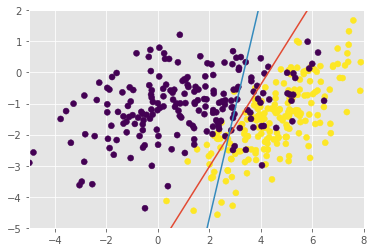

In [110]:
np.random.seed(0)

C1 = np.array([[0., -0.8], [1.5, 0.8]])
C2 = np.array([[1., -0.7], [2., 0.7]])
gauss1 = np.dot(np.random.randn(200, 2) + np.array([5, 3]), C1)
gauss2 = np.dot(np.random.randn(200, 2) + np.array([1.5, 0]), C2)

X = np.vstack([gauss1, gauss2])
y = np.r_[np.ones(200), np.zeros(200)]

clf1 = MySGDClassifier(batch_generator, max_epoch=1000, batch_size=6)
clf1.fit(X, y)

plot_decision_boundary(clf1)

clf2 = MySGDClassifier(batch_generator, model_type='log_reg', max_epoch=1000, batch_size=6)
clf2.fit(X, y)

plot_decision_boundary(clf2)

plt.scatter(X[:,0], X[:,1], c=y)
plt.xlim(-5, 8)
plt.ylim(-5, 2)

Далее будем анализировать Ваш алгоритм. 
Для этих заданий используйте датасет ниже.

In [97]:
from sklearn.datasets import make_classification

In [111]:
X, y = make_classification(n_samples=100000, n_features=10, 
                           n_informative=4, n_redundant=0, 
                           random_state=123, class_sep=1.0,
                           n_clusters_per_class=1)
(X.shape, y.shape)

((100000, 10), (100000,))

Покажите сходимости обеих регрессией на этом датасете: изобразите график  функции потерь, усредненной по $N$ шагам градиентого спуска, для разных `alpha` (размеров шага). Разные `alpha` расположите на одном графике. 

$N$ можно брать 10, 50, 100 и т.д. 

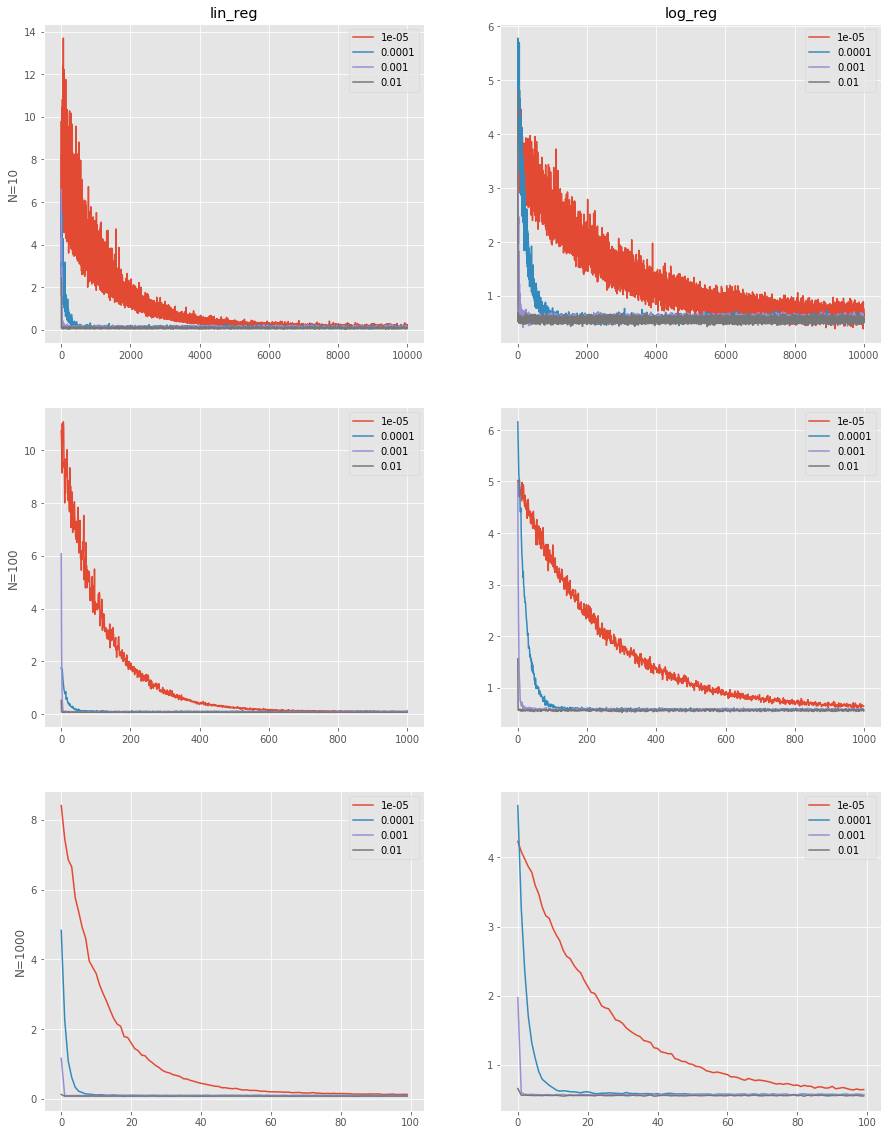

In [130]:
fig, axes = plt.subplots(3, 2)
fig.set_figheight(20)
fig.set_figwidth(15)
axes[0, 0].set_title("lin_reg")
axes[0, 1].set_title("log_reg")
axes[0, 0].set_ylabel("N=10")
axes[1, 0].set_ylabel("N=100")
axes[2, 0].set_ylabel("N=1000")
N = 10
for k, N in enumerate([10, 100, 1000]):
    lin = np.empty(X.shape[0] // N)
    log = np.empty(X.shape[0] // N)
    for i in range (-5, -1):
        clf_lin = MySGDClassifier(batch_generator, alpha = 10 ** i)
        clf_lin.fit(X, y)
        clf_log = MySGDClassifier(batch_generator, model_type='log_reg', alpha = 10 ** i)
        clf_log.fit(X, y)
        for j in range(lin.shape[0]):
            lin[j] = np.array(clf_lin.errors_log['loss'][j * N : (j + 1) * N]).mean()
            log[j] = np.array(clf_log.errors_log['loss'][j * N : (j + 1) * N]).mean()
        axes[k, 0].plot(lin, label=10**i)
        axes[k, 1].plot(log, label=10**i)
for i in range(3):
    for j in range(2):
        axes[i, j].legend()

Что Вы можете сказать про сходимость метода при различных `alpha`? Какое значение стоит выбирать для лучшей сходимости?

Чем больше `alpha`, тем быстрее сходится метод. Однако слишком большие `alpha` тоже плохи - можно всё время "перепрыгивать" экстремум. Значение `alpha=0.01` кажется мне оптимальным

Изобразите график среднего значения весов для обеих регрессий в зависимости от коеф. регуляризации С из `np.logspace(3, -3, 10)` 

[Text(0, 0, ' '),
 Text(0, 0, '1000.000'),
 Text(0, 0, '359.381'),
 Text(0, 0, '129.155'),
 Text(0, 0, '46.416'),
 Text(0, 0, '16.681'),
 Text(0, 0, '5.995'),
 Text(0, 0, '2.154'),
 Text(0, 0, '0.774'),
 Text(0, 0, '0.278'),
 Text(0, 0, '0.100')]

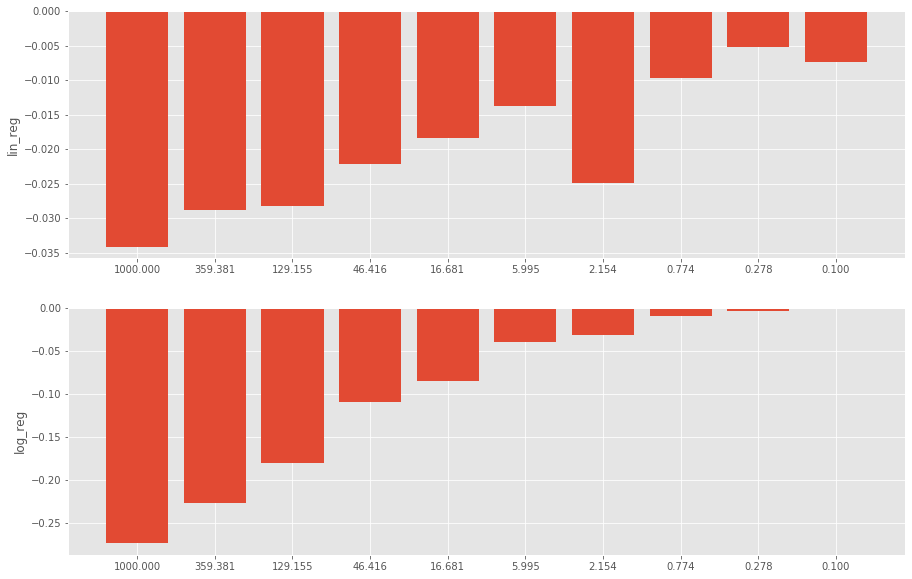

In [146]:
import matplotlib.ticker as ticker
fig, axes = plt.subplots(2, 1)
fig.set_figwidth(15)
fig.set_figheight(10)
axes[0].set_ylabel("lin_reg")
axes[1].set_ylabel("log_reg")
C = np.logspace(3, -1, 10) #при маленьких C у меня происходит переполнение
R = range(10)
W_lin = np.empty(10)
W_log = np.empty(10)
for i in R:
    clf_lin = MySGDClassifier(batch_generator, C=C[i])
    clf_lin.fit(X, y)
    clf_log = MySGDClassifier(batch_generator, model_type='log_reg', C=C[i])
    clf_log.fit(X, y)
    W_lin[i] = clf_lin.weights[1:].mean()
    W_log[i] = clf_log.weights[1:].mean()
    
l = list(" ")
l.extend(list(["{0:.3f}".format(c) for c in C]))
axes[0].bar(R, W_lin)
axes[0].xaxis.set_major_locator(ticker.MultipleLocator(1))
axes[0].set_xticklabels(l)
axes[1].bar(R, W_log)
axes[1].xaxis.set_major_locator(ticker.MultipleLocator(1))
axes[1].set_xticklabels(l)
plt.show()

Довольны ли Вы, насколько сильно уменьшились Ваши веса? 

# Боевое применение (3  балла)

Давайте применим модель на итоговом проекте! Датасет сделаем точно таким же образом, как было показано в project_overview.ipynb

Применим обе регрессии, подберем для них параметры и сравним качество. Может быть Вы еще одновременно с решением домашней работы подрастете на лидерборде!

In [155]:
doc_to_title = {}
with open('docs_titles.tsv', encoding="utf-8") as f:
    for num_line, line in enumerate(f):
        if num_line == 0:
            continue
        data = line.strip().split('\t', 1)
        doc_id = int(data[0])
        if len(data) == 1:
            title = ''
        else:
            title = data[1]
        doc_to_title[doc_id] = title
print (len(doc_to_title))

28026


In [156]:
import pandas as pd
train_data = pd.read_csv('train_groups.csv')
traingroups_titledata = {}
for i in range(len(train_data)):
    new_doc = train_data.iloc[i]
    doc_group = new_doc['group_id']
    doc_id = new_doc['doc_id']
    target = new_doc['target']
    title = doc_to_title[doc_id]
    if doc_group not in traingroups_titledata:
        traingroups_titledata[doc_group] = []
    traingroups_titledata[doc_group].append((doc_id, title, target))

In [157]:
import numpy as np
y_train = []
X_train = []
groups_train = []
for new_group in traingroups_titledata:
    docs = traingroups_titledata[new_group]
    for k, (doc_id, title, target_id) in enumerate(docs):
        y_train.append(target_id)
        groups_train.append(new_group)
        all_dist = []
        words = set(title.strip().split())
        for j in range(0, len(docs)):
            if k == j:
                continue
            doc_id_j, title_j, target_j = docs[j]
            words_j = set(title_j.strip().split())
            all_dist.append(len(words.intersection(words_j)))
        X_train.append(sorted(all_dist, reverse=True)[0:15]    )
X_train = np.array(X_train)
y_train = np.array(y_train)
groups_train = np.array(groups_train)
print (X_train.shape, y_train.shape, groups_train.shape)

(11690, 15) (11690,) (11690,)


Подберите размер батча для обучения. Линейная модель не должна учиться дольше нескольких минут. 

Не забывайте использовать скейлер!

In [158]:
from sklearn.metrics import f1_score
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:46: RuntimeWarning: overflow encountered in matmul
D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:44: RuntimeWarning: overflow encountered in matmul
D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:69: RuntimeWarning: overflow encountered in matmul
D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:116: RuntimeWarning: invalid value encountered in matmul
D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:80: RuntimeWarning: invalid value encountered in subtract


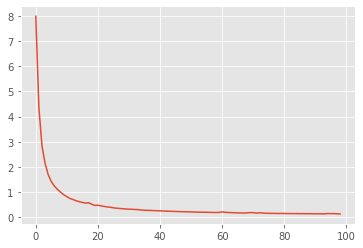

In [206]:
import time
t = list()
for b_s in range(1, 100, 1):
    start = time.time()
    clf = MySGDClassifier(batch_generator, batch_size=b_s)
    clf.fit(X_train, y_train)
    finish = time.time()
    t.append(finish-start)
    #print(b_s, finish-start)
plt.plot(t)

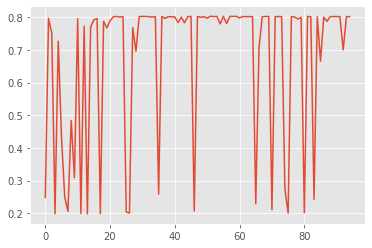

In [211]:
s = list()
for b_s in range(5, 100, 1):
    clf = MySGDClassifier(batch_generator, batch_size=b_s, max_epoch=100)
    clf.fit(X_train, y_train)
    s.append(roc_auc_score(y_train, clf.predict(X_train)))
plt.plot(s)

Разбейте данные на обучение и валидацию. Подберите параметры C, alpha, max_epoch, model_type на валидации (Вы же помните, как правильно в этой задаче делать валидацию?)

In [215]:
def validation(X, y, groups):
    g = np.unique(groups_train)
    np.random.shuffle(g)
    g_test = np.isin(groups, g[:g.shape[0] // 3])
    g_train = np.logical_not(g_test)
    return X[g_train], X[g_test], y[g_train], y[g_test]

from itertools import product
from sklearn.metrics import roc_auc_score
batch_size = 25
p = product([0.1, 1, 10, 100], [0.01, 0.001, 0.0001], range(100, 1100, 100), ['lin_reg', 'log_reg'])
best_score = 0
ans = {}
for (C, alpha, max_epoch, model_type) in p:
    X_v_train, X_v_test, y_v_train, y_v_test = validation(X_train, y_train, groups_train)
    clf = MySGDClassifier(batch_generator, model_type=model_type, max_epoch=max_epoch,
                          batch_size=batch_size, C=C, alpha=alpha)
    clf.fit(X_v_train, y_v_train)
    try:
        score = roc_auc_score(y_v_test, clf.predict(X_v_test))
        if score > best_score:
            best_score = score
            ans['C'] = C
            ans['alpha'] = alpha
            ans['max_epoch'] = max_epoch
            ans['model_type'] = model_type
    except ValueError:
        pass
print(best_score)
print(ans)

D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:46: RuntimeWarning: overflow encountered in matmul
D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:46: RuntimeWarning: overflow encountered in double_scalars
D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:44: RuntimeWarning: overflow encountered in matmul
D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:69: RuntimeWarning: overflow encountered in matmul
D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:116: RuntimeWarning: invalid value encountered in matmul
D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:69: RuntimeWarning: invalid value encountered in matmul
D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:46: RuntimeWarning: overflow encountered in matmul
D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:46: RuntimeWarning: overflow encountered in double_scalars
D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:44: RuntimeWarning: overflow encountered in matmul
D:\Anaconda3\lib\site-packages\ipyker

D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:48: RuntimeWarning: divide by zero encountered in log
D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:48: RuntimeWarning: invalid value encountered in matmul
D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:48: RuntimeWarning: divide by zero encountered in log
D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:48: RuntimeWarning: invalid value encountered in matmul
D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:48: RuntimeWarning: divide by zero encountered in log
D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:48: RuntimeWarning: invalid value encountered in matmul
D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:48: RuntimeWarning: divide by zero encountered in log
D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:48: RuntimeWarning: invalid value encountered in matmul
D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:48: RuntimeWarning: divide by zero encountered in log
D:\Anaconda3\lib\site-package

D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:48: RuntimeWarning: divide by zero encountered in log
D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:48: RuntimeWarning: invalid value encountered in matmul
D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:48: RuntimeWarning: divide by zero encountered in log
D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:48: RuntimeWarning: invalid value encountered in matmul
D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:48: RuntimeWarning: divide by zero encountered in log
D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:48: RuntimeWarning: invalid value encountered in matmul
D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:48: RuntimeWarning: divide by zero encountered in log
D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:48: RuntimeWarning: invalid value encountered in matmul
D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:48: RuntimeWarning: divide by zero encountered in log
D:\Anaconda3\lib\site-package

D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:48: RuntimeWarning: divide by zero encountered in log
D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:48: RuntimeWarning: invalid value encountered in matmul
D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:48: RuntimeWarning: divide by zero encountered in log
D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:48: RuntimeWarning: invalid value encountered in matmul
D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:48: RuntimeWarning: divide by zero encountered in log
D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:48: RuntimeWarning: invalid value encountered in matmul
D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:48: RuntimeWarning: divide by zero encountered in log
D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:48: RuntimeWarning: invalid value encountered in matmul
D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:48: RuntimeWarning: divide by zero encountered in log
D:\Anaconda3\lib\site-package

0.8544657332570392
{'C': 1, 'alpha': 0.01, 'max_epoch': 500, 'model_type': 'lin_reg'}


Подберите порог линейной модели, по достижении которого, Вы будете относить объект к классу 1. Вспомните, какую метрику мы оптимизируем в соревновании.  Как тогда правильно подобрать порог?

In [216]:
best_score = 0
best_th = 0.5
scores = list()
for th in np.arange(0.01, 1, 0.01):
    X_v_train, X_v_test, y_v_train, y_v_test = validation(X_train, y_train, groups_train)
    clf = MySGDClassifier(batch_generator, model_type=ans['model_type'], max_epoch=ans['max_epoch'],
                          batch_size=batch_size, C=ans['C'], alpha=ans['alpha'])
    clf.fit(X_v_train, y_v_train)
    score = f1_score(y_v_test, (clf.predict(X_v_test) > th).astype(int))
    scores.append(score)
    if score > best_score:
        best_score = score
        best_th = th

D:\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:46: RuntimeWarning: overflow encountered in matmul
D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:44: RuntimeWarning: overflow encountered in matmul
D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:69: RuntimeWarning: overflow encountered in matmul
D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:116: RuntimeWarning: invalid value encountered in matmul
D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:69: RuntimeWarning: invalid value encountered in matmul
D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in greater
  if __name__ == '__main__':
D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:80: RuntimeWarning: invalid value encountered in subtract


С лучшими параметрами на валидации сделайте предсказание на тестовом множестве, отправьте его на проверку на платформу kaggle. Убедитесь, что Вы смогли побить public score первого бейзлайна.

** При сдаче домашки Вам необходимо кроме ссылки на ноутбук прислать Ваш ник на kaggle, под которым Вы залили решение, которое побило первый бейзлайн. **

In [238]:
testgroups_titledata = {}
test_data = pd.read_csv('test_groups.csv')
for i in range(len(test_data)):
    new_doc = test_data.iloc[i]
    doc_group = new_doc['group_id']
    doc_id = new_doc['doc_id']
    title = doc_to_title[doc_id]
    if doc_group not in testgroups_titledata:
        testgroups_titledata[doc_group] = []
    testgroups_titledata[doc_group].append((doc_id, title))

X_test = []
groups_test = []
for new_group in testgroups_titledata:
    docs = testgroups_titledata[new_group]
    for k, (doc_id, title) in enumerate(docs):
        groups_test.append(new_group)
        all_dist = []
        words = set(title.strip().split())
        for j in range(0, len(docs)):
            if k == j:
                continue
            doc_id_j, title_j = docs[j]
            words_j = set(title_j.strip().split())
            all_dist.append(len(words.intersection(words_j)))
        X_test.append(sorted(all_dist, reverse=True)[0:15])
X_test = np.array(X_test)
groups_test = np.array(groups_test)

clf = MySGDClassifier(batch_generator, model_type=ans['model_type'], max_epoch=ans['max_epoch'],
                          batch_size=batch_size, C=ans['C'], alpha=ans['alpha'])
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
import csv
 
FILENAME = "submission.csv"
answer = [["pair_id", "target"]]
answer.extend([(test_data.iloc[i])['pair_id'],int(y_pred[i] > best_th)] for i in range(len(test_data)))
with open(FILENAME, "w", newline="") as file:
    writer = csv.writer(file)
    writer.writerows(answer)

D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:48: RuntimeWarning: divide by zero encountered in log
D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:48: RuntimeWarning: invalid value encountered in matmul


# Фидбек (бесценно)

* Какие аспекты обучения линейных моделей Вам показались непонятными? Какое место стоит дополнительно объяснить?

***Ваше ответ здесь***

* Здесь Вы можете оставить отзыв о этой домашней работе или о всем курсе.   

Мне понравилось наличие теоретической части в домашней работе. Небольшие затруднения вызвало то, что некоторые обозначения в ней не совпадали с теми обозначениями, которые были на лекции.